In [157]:
import numpy as np
%matplotlib inline
import emcee

# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534

# Generate some synthetic data from the model.
N = 50
x = np.sort(10*np.random.rand(N))
yerr = 0.1+0.5*np.random.rand(N)
y = m_true*x+b_true
y += np.abs(f_true*y) * np.random.randn(N)
y += yerr * np.random.randn(N)

In [158]:
#log likelihood function
def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))


In [159]:
#prior -restrictions on m 
def lnprior(theta):
    m, b, lnf = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0 and -10.0 < lnf < 1.0:
        return 0.0
    return -np.inf


In [160]:
#check that parameters fit within lnprior bounds; if not, return np.inf, if is, return lnlike(theta,x,y,yerr) (why +lp???)
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)


In [161]:
import scipy.optimize as op
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [m_true, b_true, np.log(f_true)], args=(x, y, yerr))
m_ml, b_ml, lnf_ml = result["x"]


In [184]:
ndim, nwalkers = 3, 100
pos = [result["x"] + .0001*np.random.randn(ndim) for i in range(nwalkers)]


In [185]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, yerr))


In [186]:
sampler.run_mcmc(pos, 500)
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))

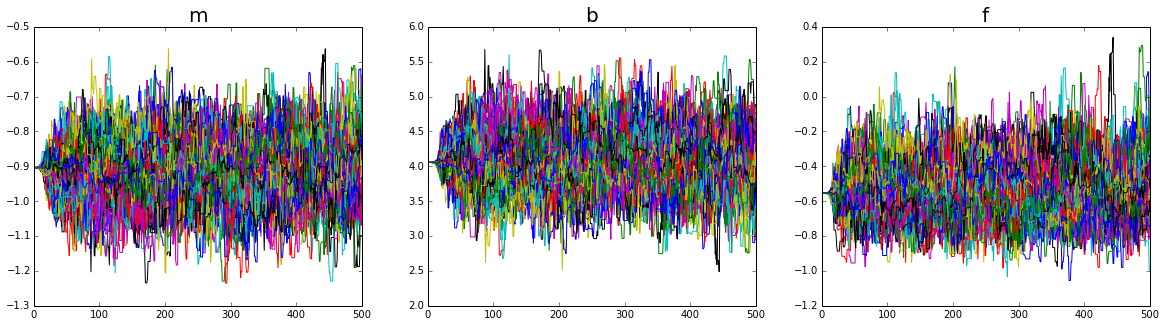

In [187]:
#xp=np.linspace(1,500,500)

f=plt.figure(figsize=(20,5))
ax=plt.subplot(131)
for i in range(0,100):
    plt.plot(xp,sampler.chain[i,:,0])
plt.title('m',fontsize=20)
ax=plt.subplot(132)
for i in range(0,100):
    plt.plot(xp,sampler.chain[i,:,1])
plt.title('b',fontsize=20)
ax=plt.subplot(133)
for i in range(0,100):
    plt.plot(xp,sampler.chain[i,:,2])
plt.title('f',fontsize=20)

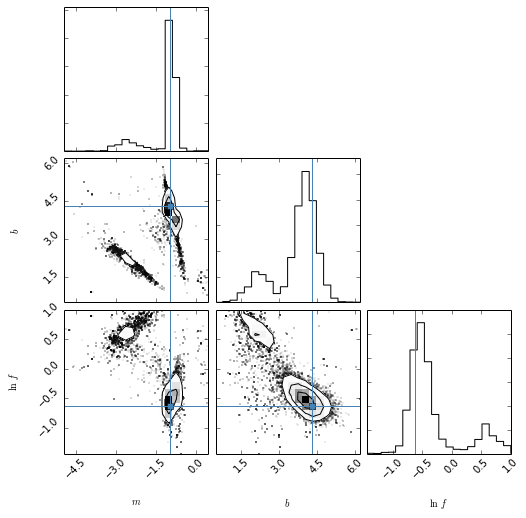

In [178]:
import corner
fig = corner.corner(samples, labels=["$m$", "$b$", "$\ln\,f$"],
                      truths=[m_true, b_true, np.log(f_true)])


In [23]:
samples[:, 2] = np.exp(samples[:, 2])
m_mcmc, b_mcmc, f_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))


In [112]:
result['x']

array([-0.95150511,  4.27244904, -0.60266172])

In [188]:
np.log(.5)

-0.69314718055994529

In [28]:
f_mcmc

(0.6642615284042972, 0.11563224676693429, 0.083487426434347367)